In [91]:
import numpy as np
import pandas as pd
import os
import urllib
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [46]:
df = pd.read_excel('Universities.xls')
df

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
1298,West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0
1300,Wheeling Jesuit College,WV,2,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,2100.0,2445.0,NaN,600.0,600.0,66.0,14.1,72.0


In [47]:
#question 1
df = df.dropna()
df

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,Univ. of Wisconsin at Eau Claire,WI,1,5729.0,4520.0,1957.0,20.0,52.0,8516.0,1264.0,2208.0,6996.0,1565.0,1140.0,1070.0,279.0,1260.0,80.0,19.3,61.0
1283,Wisconsin Lutheran College,WI,2,152.0,128.0,75.0,17.0,41.0,282.0,22.0,9100.0,9100.0,1800.0,1900.0,90.0,500.0,1400.0,48.0,8.5,50.0
1284,Alderson-Broaddus College,WV,2,582.0,498.0,172.0,21.0,44.0,799.0,78.0,10468.0,10468.0,1574.0,1806.0,92.0,660.0,1800.0,40.0,11.5,52.0
1291,Marshall University,WV,2,4226.0,3666.0,2007.0,14.0,60.0,7703.0,2339.0,1660.0,5094.0,2030.0,1980.0,330.0,700.0,1560.0,77.0,16.6,50.0


In [48]:
df.isnull()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1283,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1284,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1291,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              471 non-null    object 
 1   State                     471 non-null    object 
 2   Public (1)/ Private (2)   471 non-null    int64  
 3   # appli. rec'd            471 non-null    float64
 4   # appl. accepted          471 non-null    float64
 5   # new stud. enrolled      471 non-null    float64
 6   % new stud. from top 10%  471 non-null    float64
 7   % new stud. from top 25%  471 non-null    float64
 8   # FT undergrad            471 non-null    float64
 9   # PT undergrad            471 non-null    float64
 10  in-state tuition          471 non-null    float64
 11  out-of-state tuition      471 non-null    float64
 12  room                      471 non-null    float64
 13  board                     471 non-null    float64
 14  add. fees

In [60]:
#question 2
uni_df = uni_df.apply(lambda x: x.astype('float64'))

d = pairwise.pairwise_distances(uni_df, metric='manhattan')
pd.DataFrame(d, columns=uni_df.index, index=uni_df.index)
# scikit-learn uses population standard deviation
uni_df_norm = uni_df.apply(preprocessing.scale, axis=0)
# pandas uses sample standard deviation
uni_df_norm = (uni_df - uni_df.mean())/uni_df.std()
uni_df_norm[['# appl. accepted', '# new stud. enrolled']]
d_norm = pairwise.pairwise_distances(uni_df_norm[['# appl. accepted', '# new stud. enrolled']],
metric='manhattan')
pd.DataFrame(d_norm, columns=uni_df.index, index=uni_df.index)



,0,2,9,11,21,25,31,37,38,45,...,1261,1267,1268,1272,1273,1274,1283,1284,1291,1301
0,0.000000,0.048715,0.429912,0.228010,0.846587,1.409292,0.196315,0.468834,0.353545,1.188445,...,0.613706,0.312161,0.998410,0.384479,1.791746,3.824228,0.029032,0.268369,3.537747,1.658977
2,0.048715,0.000000,0.404361,0.202460,0.821037,1.383742,0.170765,0.443284,0.327995,1.162894,...,0.588155,0.286611,0.972860,0.358929,1.766195,3.798678,0.019683,0.242819,3.512197,1.633427
9,0.429912,0.404361,0.000000,0.201902,0.416676,0.979380,0.233597,0.067318,0.076367,0.758533,...,0.183794,0.117751,0.568499,0.045432,1.361834,3.394317,0.415258,0.161542,3.107836,1.229066
11,0.228010,0.202460,0.201902,0.000000,0.618578,1.181282,0.116882,0.240824,0.217397,0.960435,...,0.385696,0.099328,0.770400,0.158067,1.563736,3.596219,0.213356,0.057933,3.309738,1.430968
21,0.846587,0.821037,0.416676,0.618578,0.000000,0.754417,0.650273,0.377754,0.493043,0.686939,...,0.232882,0.534426,0.357115,0.462108,0.945158,2.977641,0.831934,0.578218,2.691160,0.812390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,3.824228,3.798678,3.394317,3.596219,2.977641,2.414936,3.627914,3.355394,3.470684,2.635784,...,3.210523,3.512067,2.825818,3.439749,2.032483,0.000000,3.809575,3.555859,0.395695,2.165251
1283,0.029032,0.019683,0.415258,0.213356,0.831934,1.394638,0.181661,0.454180,0.338891,1.173791,...,0.599052,0.297507,0.983757,0.369826,1.777092,3.809575,0.000000,0.253716,3.523094,1.644324
1284,0.268369,0.242819,0.161542,0.057933,0.578218,1.140923,0.072055,0.200465,0.159464,0.920075,...,0.345336,0.043792,0.730041,0.116110,1.523376,3.555859,0.253716,0.000000,3.269378,1.390608
1291,3.537747,3.512197,3.107836,3.309738,2.691160,2.128455,3.341433,3.068913,3.184203,2.349303,...,2.924042,3.225586,2.539337,3.153268,1.746002,0.395695,3.523094,3.269378,0.000000,1.878770


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [13.75, 13.75, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [80.0, 80.0, 113.75, 113.75],
  [31.875, 31.875, 96.875, 96.875],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [170.0, 170.0, 200.0, 200.0],
  [150.0, 150.0, 185.0, 185.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [233.75, 233.75, 281.25, 281.25],
  [335.0, 335.0, 345.0, 345.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [340.0, 340.0, 362.5

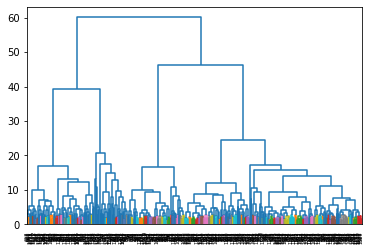

In [79]:
import scipy.cluster.hierarchy as shc
Z = linkage(uni_df_norm, method='ward')
dendrogram(Z, labels=norm_df.index, color_threshold=2.75)

I think that four clusters is the perfect amount. There is enough information with each of the five to get some since of the data. while it not being too small. The size of the smallest cluster is 47 and the largets is 158. the more clusters we have the smaller the size. It can lead to there being clusters with one record. This size helps with showing variation without being too small. All the variables are aroudn the same size.

I think ward's method and euclidean works best because it focuses on making sure information is not loss. So, variations in data can show.

In [88]:
# Question 3
memb = fcluster(linkage(uni_df_norm, method='ward', metric='euclidean'), 5, criterion='maxclust')
centroids = {}
for key, item in df.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 95
Cluster 2: size 47
Cluster 3: size 80
Cluster 4: size 91
Cluster 5: size 158


,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
1,1.11,3341.36,2213.41,941.35,16.99,44.64,4539.58,1014.83,2591.03,6044.09,1929.49,1688.61,586.97,522.25,1462.54,71.57,17.30,55.33
2,1.13,11143.45,7573.85,2937.23,31.23,61.81,14877.74,3446.45,4086.57,8741.79,2286.17,2106.96,544.96,599.60,1904.09,84.83,15.83,61.13
3,2.00,4305.92,2202.69,691.96,56.05,83.04,2700.85,208.90,17339.79,17339.79,2909.69,2637.85,357.62,587.76,972.52,90.12,10.19,84.50
4,1.99,1754.46,1345.24,446.92,26.60,55.90,1738.58,517.77,12543.66,12542.56,2445.40,2441.64,362.19,522.42,1067.35,78.24,13.19,74.07
5,1.99,867.59,675.79,279.79,20.30,46.43,1097.16,337.85,9263.62,9286.66,1899.27,1941.59,225.16,545.07,1357.97,59.27,13.76,58.55


Cluster one is on the lower end of faculty with Ph.D.s, graduation rate and cost. However, they have higher student acceptances, average new students enrolled, and the highest student-to-teacher ratio. This is public universities.
Cluster two is public universites with variables arounf the same area except they have the highest application acceptance, percentance of fac. with Ph.D., and graduation rates. So, they are slightly better in terms of education.
Cluster three is private universities. The acceptances are fairly similar to cluster one but their enrolled students are lower at 691.96 students. They have the highest % of new students from the top 10 and 25%. their full time an dparttime students are the lowest and cost are the highest. the % of fac. with Ph.D. and graduation rates are the highest Student to fac. ratio is the lowest. 
Clusters four and five are fairly similar. They're both private university clusters. cluster is around the same as cluster five just a little better. Cluster four enrolled more students and students paid more and had higher grad. rates and fac. with Ph.D. student to fac. ratio was lower. Cluster five had less acceptances, students, cost, and grad. rate yet higher student- teacher ratio.

Question 4 
Essentially, cluster 3 was a private school that has the best resources and students yet a higher price. But, all the private university clusters, 3, 4, and 5, had best resources in comparison to the public university clusters. With an exception to the price.

In [99]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=uni_df_norm.columns)
pd.set_option('precision', 3)
centroids

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,-1.609,0.018,0.022,0.114,-0.696,-0.648,0.160,0.122,-1.304,-1.091,-0.431,-0.834,0.562,-0.188,0.255,-0.080,0.978,-0.722
1,0.577,-0.548,-0.546,-0.538,-0.542,-0.615,-0.526,-0.247,-0.148,-0.448,-0.487,-0.405,-0.391,0.057,0.128,-1.078,-0.022,-0.491
2,-1.262,3.695,4.120,4.059,0.342,0.657,4.006,2.670,-0.960,-0.349,-0.071,0.057,1.115,0.133,0.888,0.833,0.878,0.052
3,-1.400,1.187,1.384,1.727,0.021,0.072,1.850,1.413,-1.113,-0.601,-0.074,-0.241,0.162,0.341,1.079,0.631,0.334,-0.382
4,0.596,-0.352,-0.310,-0.387,0.098,0.208,-0.403,-0.279,0.588,0.481,0.192,0.447,-0.145,-0.184,-0.422,0.328,-0.196,0.457
5,0.574,0.542,0.227,0.072,1.782,1.514,-0.042,-0.361,1.515,1.701,1.223,1.046,0.128,0.332,-0.445,1.091,-1.158,1.149


question 5:

external information that can help understand the data is the type of universities. Is it a PWI or an HBCU? Is it a perty school? (if it a party school students made not care about staying) Students thoughts on the university, did they transfer do they currently like the school, what could make student dropout, and how much financial aid was given to students.